In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error


In [ ]:
df=pd.read_csv('train (1).csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
#mean=40000
#std=2800
#df['Price']=np.random.normal(mean, std,173)

In [ ]:
df.shape

(333, 15)

In [ ]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.skew()

ID         0.064113
crim       4.598981
zn         2.374052
indus      0.290434
chas       3.720006
nox        0.705552
rm         0.284028
age       -0.604644
dis        0.938143
rad        0.983258
tax        0.633027
ptratio   -0.789838
black     -2.998422
lstat      0.978328
medv       1.122472
dtype: float64

**VISUALIZATION**

<Axes: >

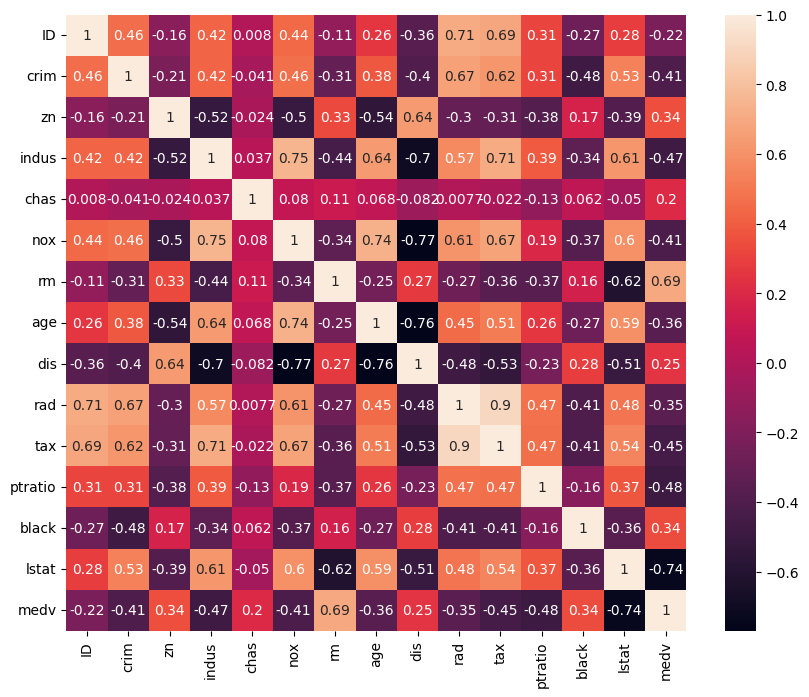

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='lstat', ylabel='medv'>

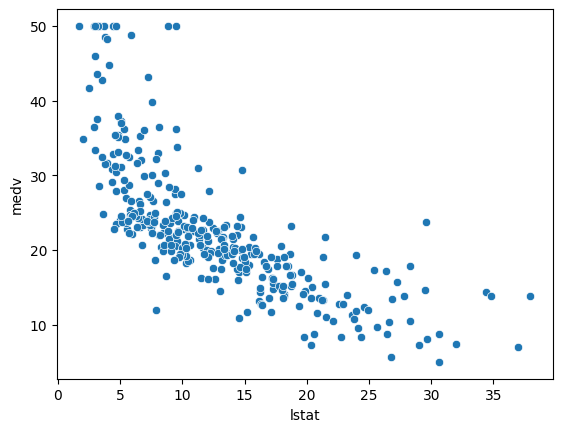

In [ ]:
sns.scatterplot(x='lstat',y='medv',data=df)

<Axes: xlabel='rm', ylabel='medv'>

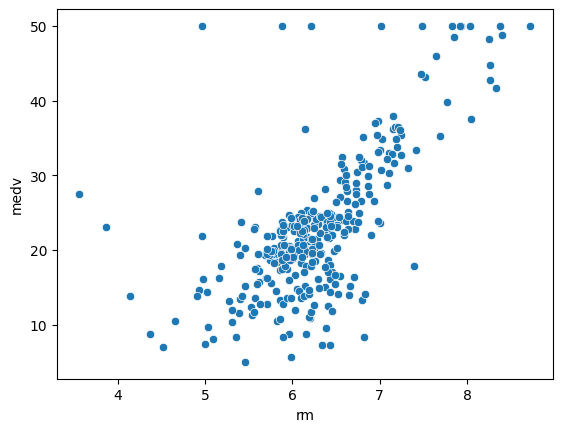

In [ ]:
sns.scatterplot(x='rm',y='medv',data=df)

<Axes: xlabel='ptratio', ylabel='medv'>

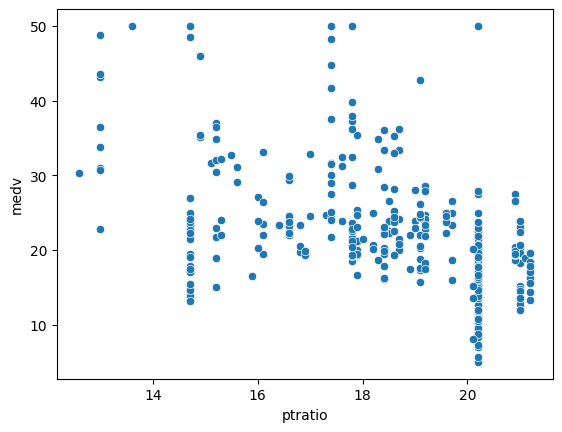

In [ ]:
sns.scatterplot(x='ptratio',y='medv',data=df)

<Axes: xlabel='lstat', ylabel='medv'>

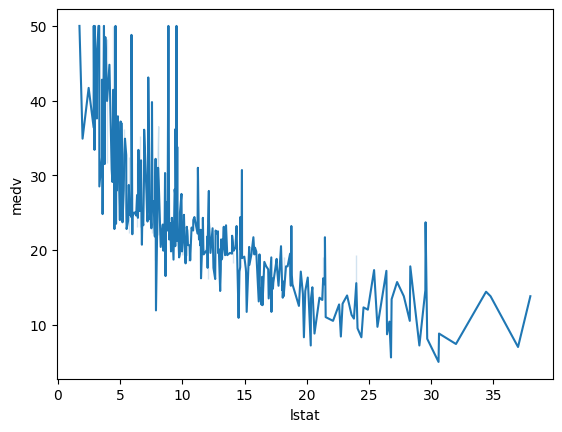

In [ ]:
sns.lineplot(x="lstat",y="medv",data=df)

<Axes: xlabel='rm', ylabel='medv'>

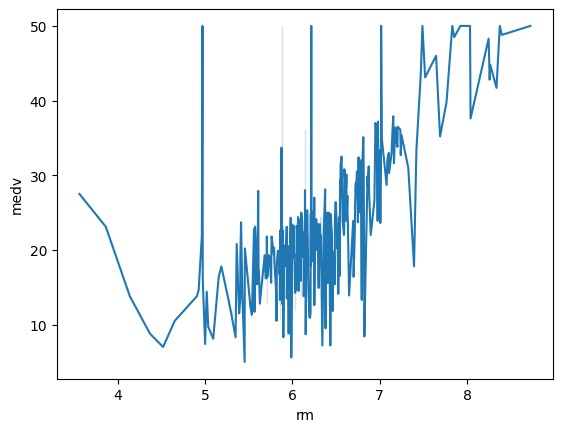

In [ ]:
sns.lineplot(x="rm",y="medv",data=df)

<Axes: xlabel='ptratio', ylabel='medv'>

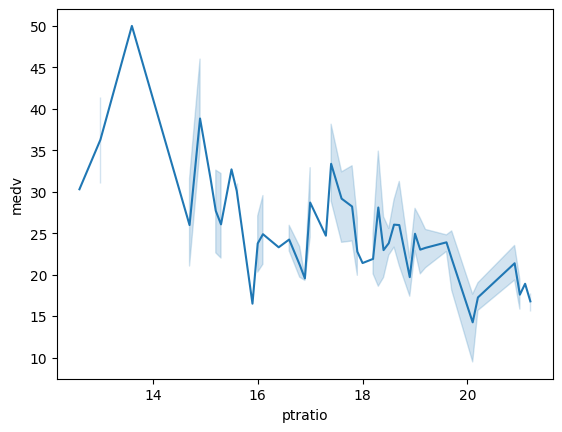

In [ ]:
sns.lineplot(x="ptratio",y="medv",data=df)

**FEATURE SCALING (FORWARD SELECTION)**

In [ ]:
X=df.drop(['medv'],axis=1)
y=df['medv']

In [ ]:
sfs = SFS(LinearRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('rm', 'ptratio', 'lstat')

**MULTI VARIATE LINEAR REGRESSION**

In [ ]:
X=df[['rm','ptratio','lstat']]
y = df['medv']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)


print (y_pred)



[20.51568455 22.42015599 15.16561028 28.82170366 23.30446339 20.51391027
 20.85415227 33.20756956  8.53991011 27.764987   30.23783167 32.72142691
 25.42727883 22.56023352  6.00325139 32.0020792  19.79345673 22.72817674
 23.41313467 17.64518106 17.61164915 23.27730337 26.30797648 12.6659565
 19.38603343 32.30479933 19.19688376  9.72485712 14.64140767 20.42597548
 24.07022662 28.43154702 21.39471563 30.89574343 22.0795472  24.54363852
 19.70586225 12.0859536  24.6556568  32.31581372 18.73352174 22.80153967
 26.49562733 35.17860773 29.61646333 14.62960661  1.94686897 22.04350284
 26.80190478 15.21113482 18.83139478 37.14964587 27.90129883 25.19050894
 26.20816502 28.47451058 23.60697373 15.03777065 27.73648592 20.59038901
  8.66063251 16.78958652 17.55299543 23.75578358 19.20711107 21.35275079
 26.05442136 28.50360541 32.44724688 16.80289815 39.79950664 22.16348705
 34.49921198 28.08001988  9.55334639 13.53135293 19.76003094 11.4807009
 12.52125776 33.10352418 24.15202457 20.0816775  36.4

**R2 SCORE CALCULATED**

In [ ]:
print(regr.score(X_test, y_test))

0.6766179164279447


**MEAN SQUARED AND ROOT MEAN SQUARED ERROR CALCULATED**

In [ ]:
true = df['medv'].values  # Convert 'true' to a NumPy array if it's a pandas Series

mse = mean_squared_error(true[:84], y_pred[:84])  # Use the same number of samples for both 'true' and 'y_pred'
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Mean Squared Error: 79.24392778052473
Root Mean Squared Error: 8.901905851025651
